import sys
!{sys.executable} -m pip install scikit-learn-extra

In [1]:
import pandas as pd
import numpy as np
import Assignment as a
from Kmenoids import Kmenoids as kmen
data = pd.read_csv("darrendata.csv")
#data = pd.read_csv("data/ripa_preprocessed2.csv", low_memory=False)

In [2]:
data['beat']

0         122
1         121
2         822
3         822
4         614
         ... 
464039    116
464040    614
464041    614
464042    625
464043    822
Name: beat, Length: 464044, dtype: int64

In [3]:
data = data.sample(n=25000)

# Data Visualization

In [4]:
import matplotlib.pyplot as plt
def barplotCounts(data,title,xaxis="xaxis",yaxis="yaxis",fontsize='13'):
    plt.bar(data.value_counts().keys().tolist(),data.value_counts().values.tolist(),color = 'b',width=.25)
    plt.title(title,fontsize=fontsize)
    plt.xlabel(xaxis, fontsize=fontsize)
    plt.ylabel(yaxis, fontsize=fontsize)


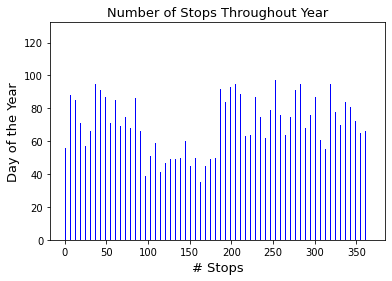

In [5]:
barplotCounts(data['dayofyear'],'Number of Stops Throughout Year', "# Stops", "Day of the Year")

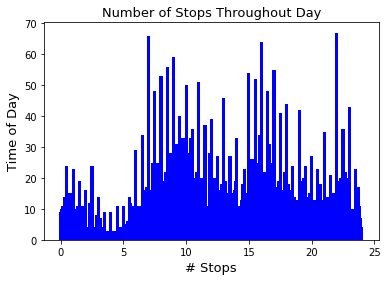

In [6]:
barplotCounts(data['timeofday'],"Number of Stops Throughout Day","# Stops","Time of Day")

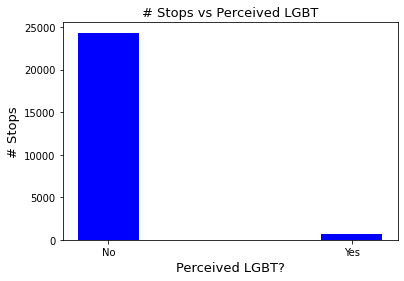

In [7]:
#ax = plt.bar({x:data.keys(),y:data.values()})
barplotCounts(data['perceived_lgbt'],"# Stops vs Perceived LGBT","Perceived LGBT?","# Stops")
#testData['perceived_lgbt'].value_counts().keys

In [8]:
data['perceived_gender'].value_counts()

gender_male      18188
gender_female     6735
gender_other        77
Name: perceived_gender, dtype: int64

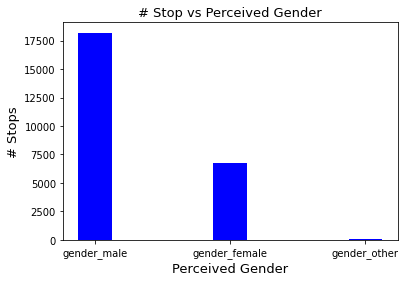

In [9]:
barplotCounts(data['perceived_gender'],"# Stop vs Perceived Gender","Perceived Gender","# Stops")

In [10]:
ages = data['perceived_age'].value_counts()

In [11]:
sortedAges = sorted(ages.keys())

In [12]:
sortedValues = [ages[x] for x in sortedAges]

In [13]:
ages = dict(zip(sortedAges,sortedValues))

In [14]:
consolidateSeniors = 0
for i in sortedAges:
    if i >= 62:
        consolidateSeniors += ages[i]
        ages.pop(i)
ages['62+'] = consolidateSeniors

In [15]:
orderedAges = {}
consolidateUnderage = 0
for i in sortedAges:
    if i <= 16:
        consolidateUnderage += ages[i]
        ages.pop(i)
orderedAges['<16'] = consolidateUnderage

In [16]:
orderedAges.update(ages)

In [17]:
perAges = pd.DataFrame({'age':orderedAges.keys(),'number':orderedAges.values()})

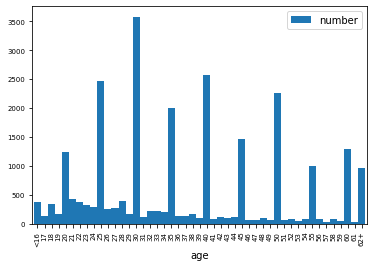

In [18]:
ax = perAges.plot.bar(x='age',y='number',rot=90,width=1, fontsize=7)

Clustering

In [19]:
data['beat'] = data['beat'].map(str)

In [20]:
data['beat']

100599    242
364677    522
201849    446
459933    723
52406     514
         ... 
26077     122
415022    523
451476    445
93209     521
369814    112
Name: beat, Length: 25000, dtype: object

In [21]:
import matplotlib.pyplot as plt
def PlotResults(X,r,xaxis="x-axis",yaxis="y-axis",fontsize='13',algos=["K - Means","Mixture of Gaussians","Birch","K - Medoids"]):
    '''
    Plots cluster results
        Parameters:
            X[2xN Matrix]: 2xN Matrix of Datapoints to be plotted
            r[?xN Matrix]: NumClusteringAlgorithmsxN Matrix of Datapoint Assignments from the Clustering Algorithms.
        Returns:
            Plotted results of clustering algorithms in 2x[NumclusteringAlgorithms/2] subplot figure with different colors for each cluster
    '''
    
    col = 2
    rows = int(np.ceil(len(r)/col))
    
    K = len(np.unique(r[0]))
    
    fig, axs = plt.subplots(rows, col,figsize=(6*col,5*rows))
    
    #print(len(r))
    
    for i in range(0,len(r)):
        if i < col:
            axs[0,i].set_title(algos[i], fontsize=fontsize)
        else:
            axs[int(i/col),i%col].set_title(algos[i],fontsize=fontsize)
    
    plt.xticks(np.arange(0, max(X[0]), round(max(X[0])/5)))
    plt.yticks(np.arange(0, max(X[1]), round(max(X[1])/5)))
    
    COLORS = ['r','g','b','m','c','y','k','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    
    for i in range(len(r)):
        colors = None
        colors = np.where(r[i]==0,COLORS[0],'-')
        for k in range(K-1):
            colors[r[i]==k+1] = COLORS[k+1]
        if(rows>1):
            axs[int(i//col),i%col].scatter(X[0], X[1], c=colors, s=1)
        else:
            axs[i].scatter(X[0], X[1], c=colors)
    # Create common X and Y axis
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)

    plt.xlabel(xaxis, fontsize=fontsize)
    plt.ylabel(yaxis, fontsize=fontsize)
        

### Date Stop vs Time Stop

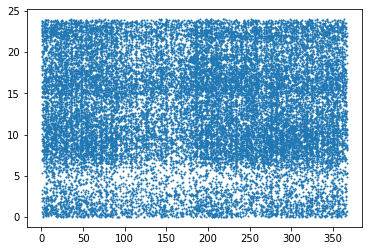

In [22]:
plt.scatter(data.dayofyear, data.timeofday,s=1)

In [23]:
results = a.AssignmentFunction(np.array((data.dayofyear, data.timeofday)).T,3,20000)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [24]:
kmenoidResult = kmen(np.array((data.dayofyear, data.timeofday)).T,3,2000)

Fitting KMenoids


In [25]:
results = np.vstack([results, kmenoidResult])

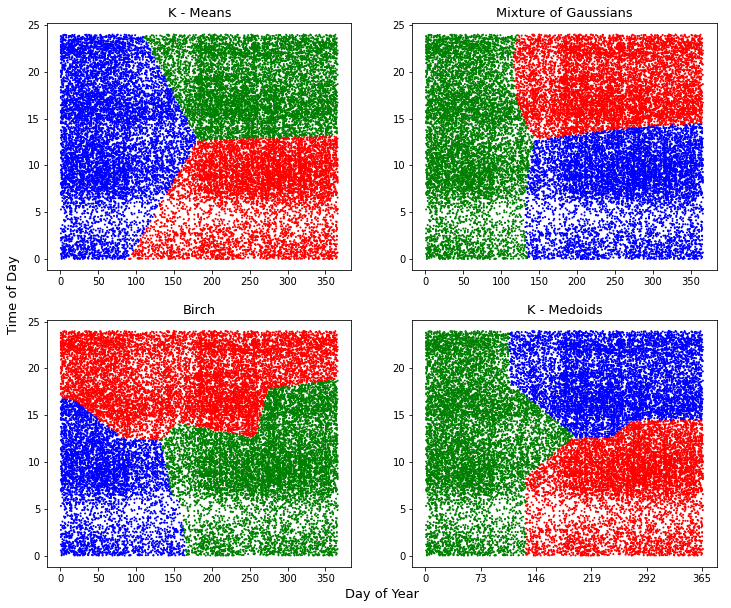

In [26]:
PlotResults(np.array((data.dayofyear, data.timeofday)),results,xaxis="Day of Year",yaxis="Time of Day")

### Beat vs Time Stop

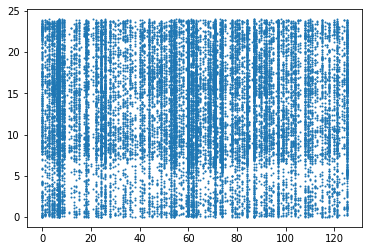

In [27]:
plt.scatter(data.beat_cat, data.timeofday,s=1)

In [28]:
resultsBeatTime = a.AssignmentFunction(np.array((data.beat_cat, data.timeofday)).T,5,20000)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [29]:
kmenoidResult = kmen(np.array((data.beat, data.timeofday)).T,5,20000)

Fitting KMenoids


In [30]:
resultsBeatTime = np.vstack([resultsBeatTime, kmenoidResult])

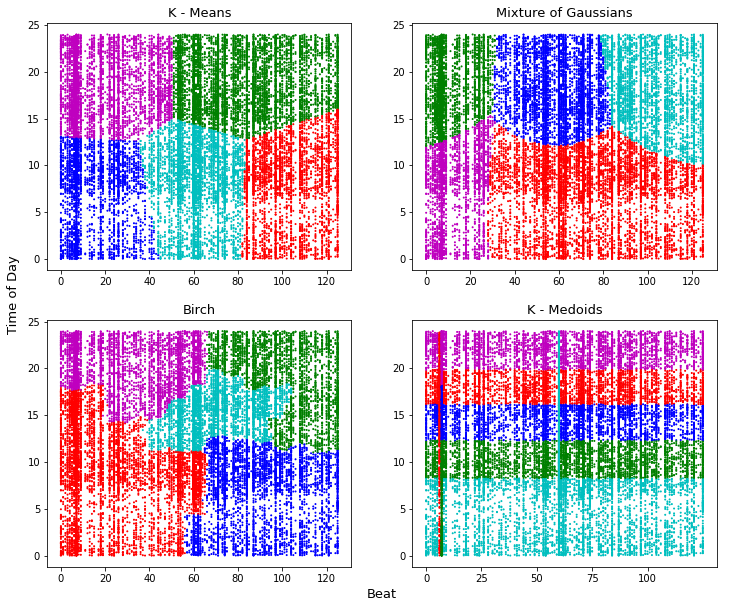

In [31]:
PlotResults(np.array((data.beat_cat, data.timeofday)),resultsBeatTime,xaxis="Beat",yaxis="Time of Day")

### Beat vs Date

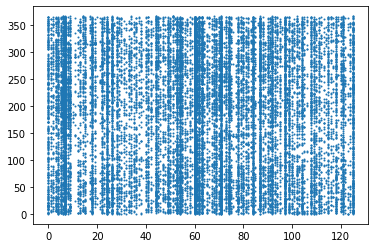

In [32]:
plt.scatter(data.beat_cat, data.dayofyear,s=1)

In [33]:
resultsBeatDate = a.AssignmentFunction(np.array((data.beat_cat, data.dayofyear)).T,4,20000)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [34]:
kmenoidResult = kmen(np.array((data.beat, data.dayofyear)).T,4,20000)                      
                         

Fitting KMenoids


/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


In [35]:
resultsBeatDate = np.vstack([resultsBeatDate, kmenoidResult])

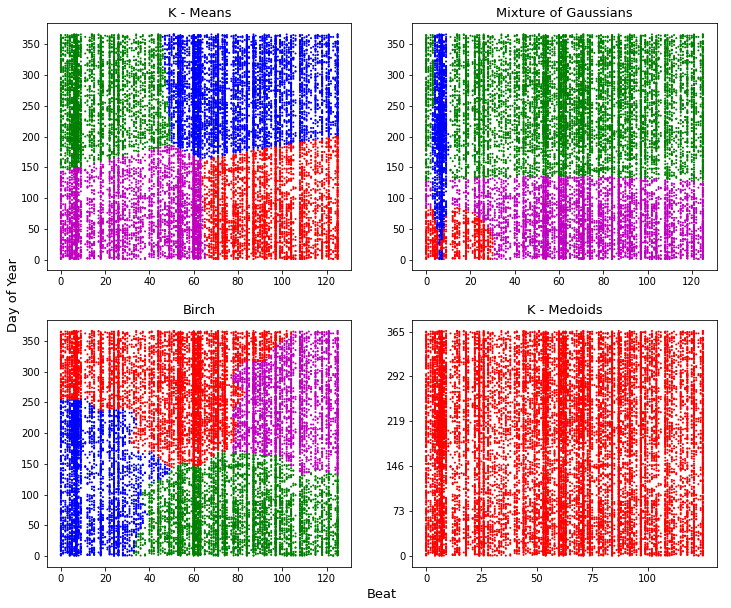

In [36]:
PlotResults(np.array((data.beat_cat, data.dayofyear)),resultsBeatDate,xaxis="Beat",yaxis="Day of Year")

### Beat vs Stop Duration

In [37]:
resultsStopDuration = a.AssignmentFunction(np.array((data.beat_cat, data.stopduration)).T,3,20000)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [38]:
kmenoidResult = kmen(np.array((data.beat, data.stopduration)).T,3,20000)
                           

Fitting KMenoids


/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


In [39]:
resultsStopDuration = np.vstack([resultsStopDuration, kmenoidResult])

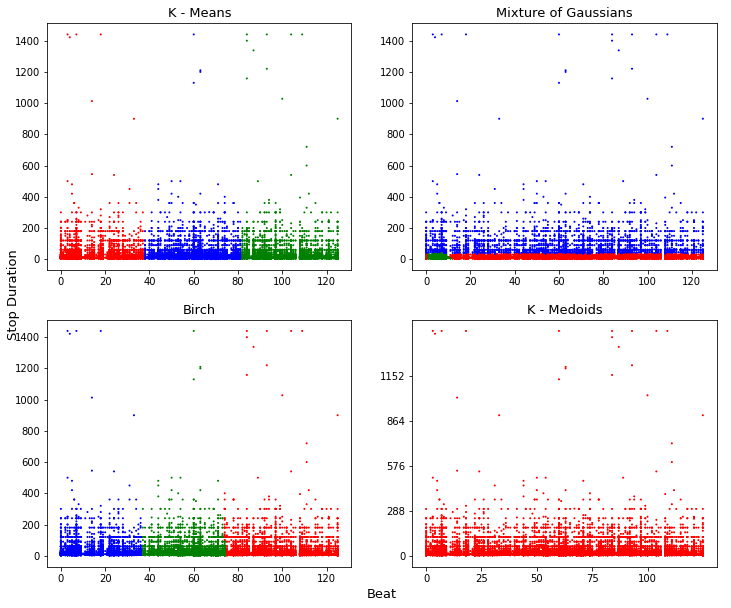

In [40]:
PlotResults(np.array((data.beat_cat, data.stopduration)),resultsStopDuration,xaxis="Beat",yaxis="Stop Duration")

### Date vs Stop Duration

In [41]:
data['stopduration'] = data['stopduration'].map(float)

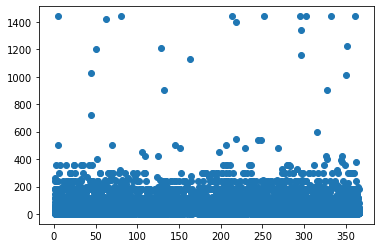

In [42]:
plt.scatter(data.dayofyear,data.stopduration)

In [43]:
resultsDateStopDuration = a.AssignmentFunction(np.array((data.dayofyear, data.stopduration)).T,3,20000)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [44]:
kmenoidResult = kmen(np.array((data.dayofyear, data.stopduration)).T,3,20000)

Fitting KMenoids


/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


In [45]:
resultsDateStopDuration = np.vstack([resultsDateStopDuration, kmenoidResult])

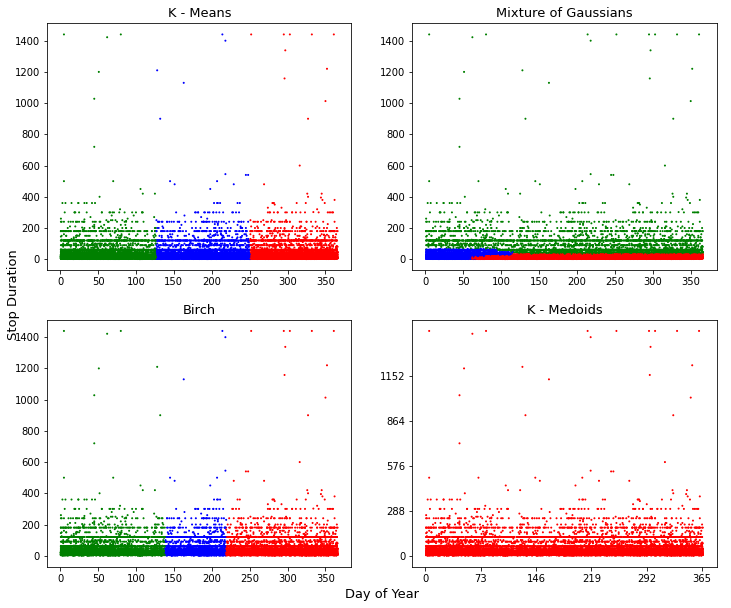

In [46]:
PlotResults(np.array((data.dayofyear, data.stopduration)),resultsDateStopDuration,xaxis="Day of Year",yaxis="Stop Duration")

### Beat vs Officer Assignment

In [47]:
data['officer_assignment_key_str'] = data['officer_assignment_key'].map(str)

In [48]:
resultsBeatAssignment = a.AssignmentFunction(np.array((data.beat_cat, data.officer_assignment_key)).T,3,200000)


Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


In [49]:
kmenoidResult = kmen(np.array((data.beat, data.officer_assignment_key_str)).T,3,200000)

Fitting KMenoids


/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.0.8/libexec/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


In [50]:
resultsBeatAssignment = np.vstack([resultsBeatAssignment, kmenoidResult])

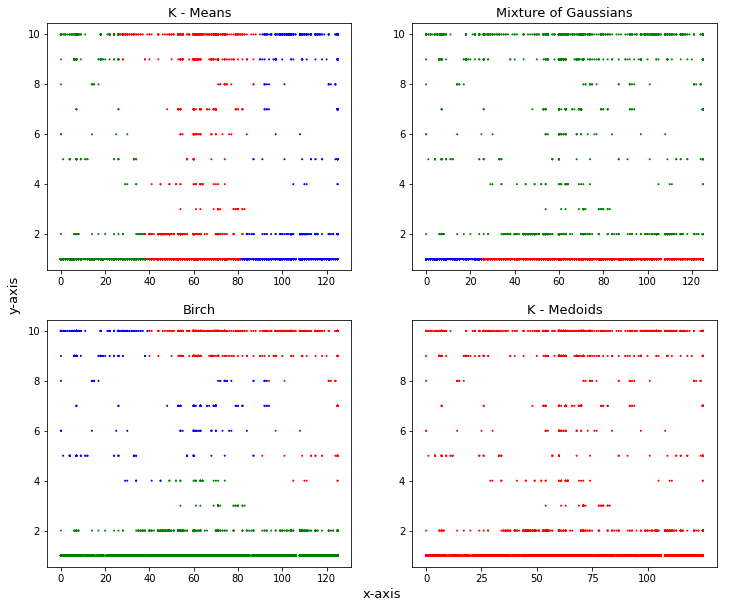

In [51]:
PlotResults(np.array((data.beat_cat, data.officer_assignment_key)),resultsBeatAssignment)